<a href="https://colab.research.google.com/github/Uttumon/Data_Visualization/blob/main/DV1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Missing Values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Data Description:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  

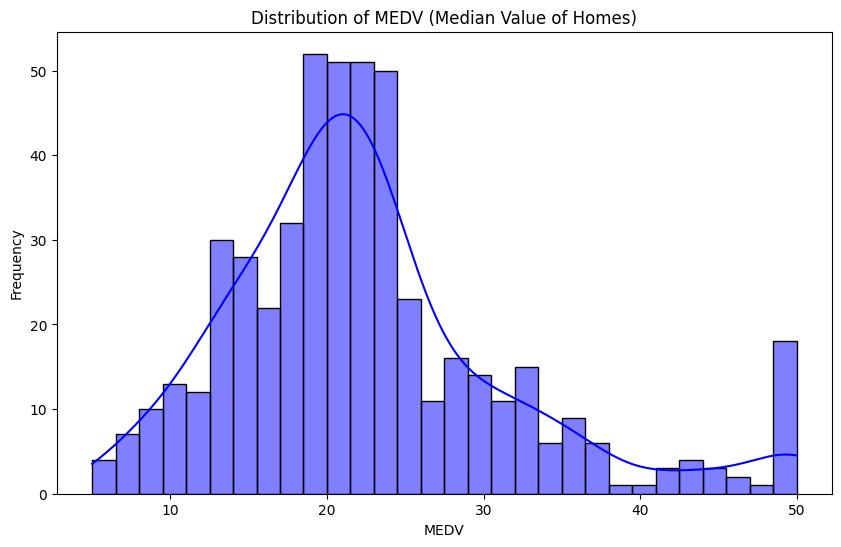

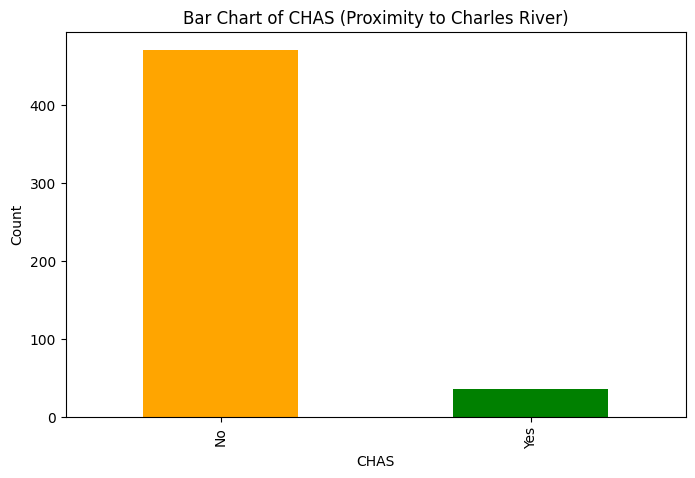

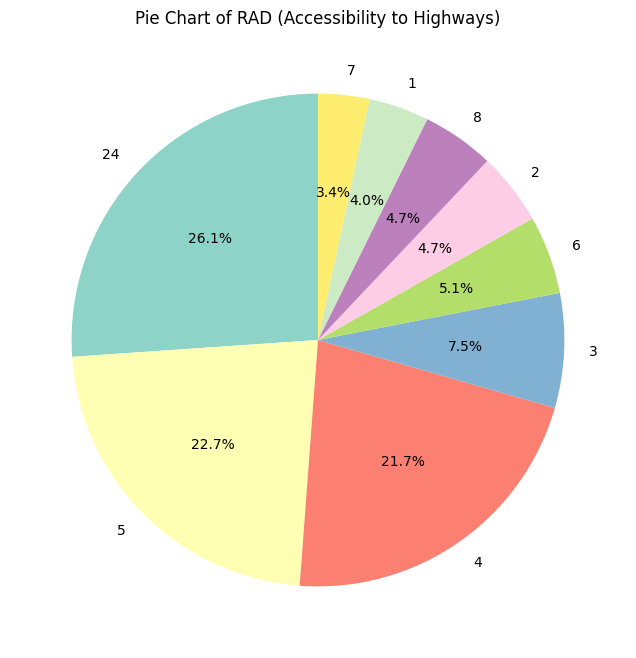

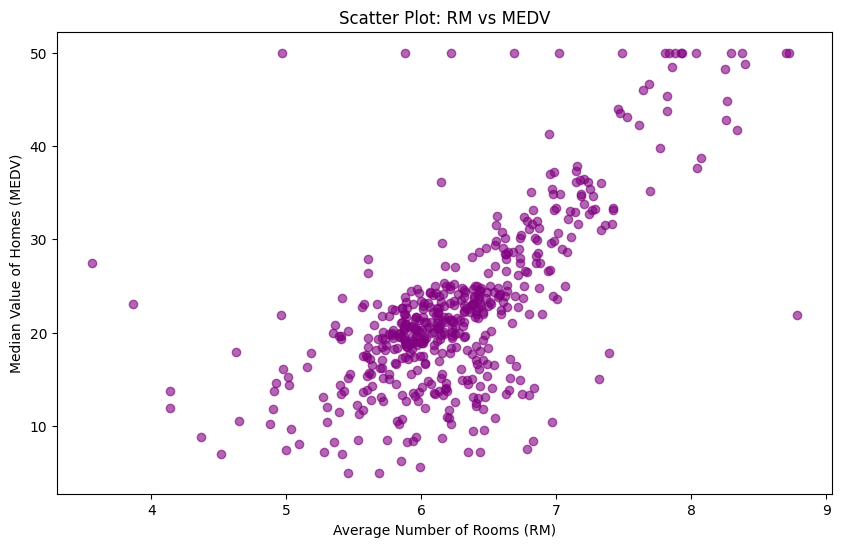


Model Performance:
Mean Squared Error: 24.291119474973478
R^2 Score: 0.6687594935356326


<Figure size 1000x600 with 0 Axes>

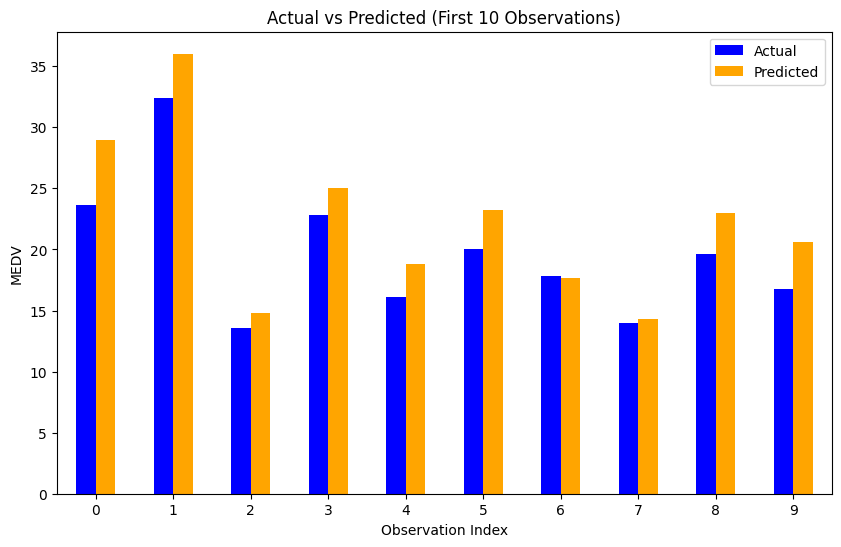

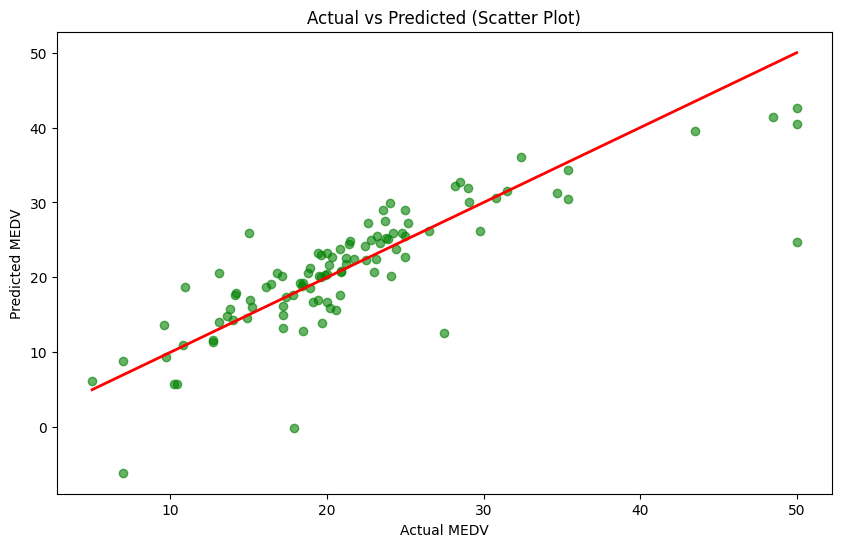

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = 'housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, header=None, names=column_names)

print("Initial Data:")
print(data.head())

# Clean the data
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())
# Step 4: Explore the data
# Basic statistics
print("\nData Description:")
print(data.describe())

# Visualizations
# Distribution of MEDV
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

# Bar chart of CHAS (Charles River dummy variable)
chas_counts = data['CHAS'].value_counts()
plt.figure(figsize=(8, 5))
chas_counts.plot(kind='bar', color=['orange', 'green'])
plt.title('Bar Chart of CHAS (Proximity to Charles River)')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Pie chart of RAD (Index of accessibility to radial highways)
rad_counts = data['RAD'].value_counts()
plt.figure(figsize=(8, 8))
rad_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Pie Chart of RAD (Accessibility to Highways)')
plt.ylabel('')
plt.show()

# Scatter plot of RM vs MEDV
plt.figure(figsize=(10, 6))
plt.scatter(data['RM'], data['MEDV'], alpha=0.6, color='purple')
plt.title('Scatter Plot: RM vs MEDV')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()

# Feature Engineering
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the predictive model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model’s performance
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the predictions
# Bar chart: Actual vs Predicted (first 10 observations)
predictions = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
plt.figure(figsize=(10, 6))
predictions.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Actual vs Predicted (First 10 Observations)')
plt.xlabel('Observation Index')
plt.ylabel('MEDV')
plt.xticks(rotation=0)
plt.show()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted (Scatter Plot)')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.show()